<a href="https://colab.research.google.com/github/antoinemarchal/fBms/blob/master/fBms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook fBms

###About this *notebook*

####Notebook Authors:
Antoine Marchal


## Installing fBms
[fBms](https://github.com/antoinemarchal/fBms) is a code for 

In [0]:
!pip install fBms

## Getting started with fBms

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from fBms import fBmnd, Pkgen, Pkgen_break

In [0]:
#shape of you cube or map
shape = (512,512)

#input parameters fBmnd - n is the spectral index, 
#k0 and k1 is spatial frequency range
n=2.7 
k0=0.01; k1=0.4

#Use Pkgen() to simulate a single power law
field = fBmnd(shape, Pkgen(n,k0,k1), seed=31, unit_length=1)

#n1 and n2 are spectral indices and kcrit is the frequency of the break
n1=3.; n2=3.6 
k2=0.0; k3=np.inf
kcrit=0.08 

#Use Pkgen_break() to simulate a single power law with a break
field_break = fBmnd(shape, Pkgen_break(n1, n2, kcrit, k2, k3), seed=32, 
                    unit_length=1)

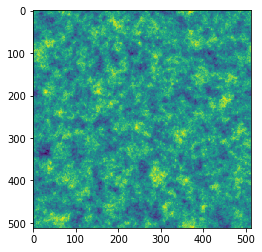

In [0]:
plt.figure()
plt.imshow(field)

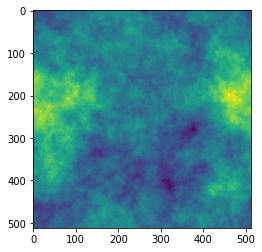

In [0]:
plt.figure()
plt.imshow(field_break)